# Please scroll down to see the result <br>
Please Run the following cell

Using Value Iteration
  State  Optimal Value Optimal Action
0  high       8.474492         search
1   low       7.627034       recharge

Using Policy Iteration
  State  Optimal Value Optimal Action
0  high       8.474490         search
1   low       7.627032       recharge


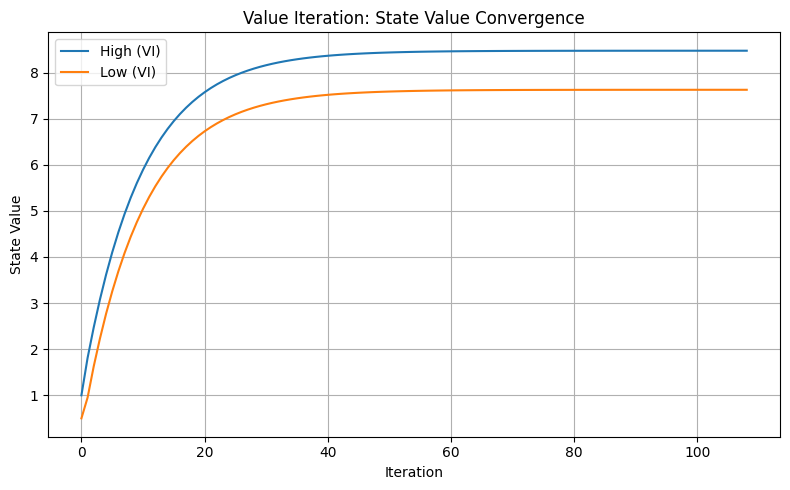

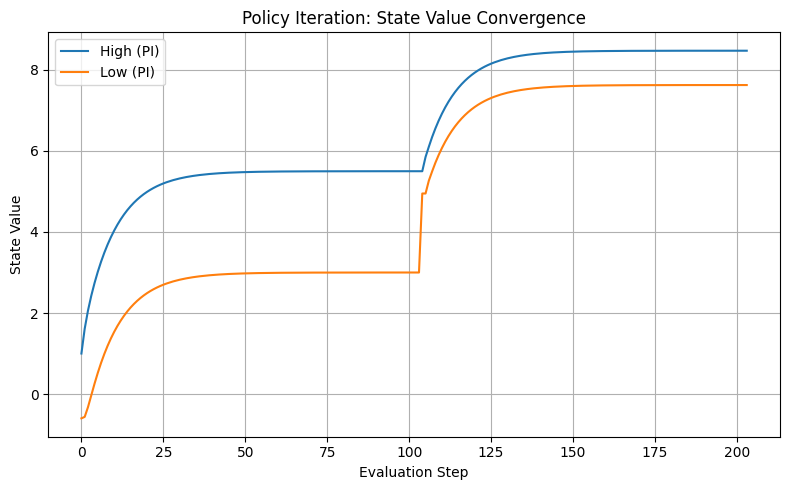

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



alpha = 0.8     # probability of staying in high after search
beta = 0.6      # probability of staying in low after search
gamma = 0.9     # discount factor


r_s = 1.0       # reward for search
r_w = 0.5       # reward for wait
r_fail = -3.0   # penalty when search fails in low

# indexing the states
states = ['high', 'low']
state_idx = {'high': 0, 'low': 1}
n_states = len(states)

# actions
actions = ['search', 'wait', 'recharge']
action_idx = {'search': 0, 'wait': 1, 'recharge': 2}

# available actions in each state
available_actions = {
    'high': ['search', 'wait'],
    'low': ['search', 'wait', 'recharge']
}

def value_iteration(threshold=1e-5, max_iterations=1000):
    V = np.zeros(n_states)
    policy = np.zeros(n_states, dtype=int)
    deltas = []
    value_trace = []

    for _ in range(max_iterations):
        delta = 0
        V_new = np.copy(V)
        for state in states:
            s = state_idx[state]
            action_values = []
            for action in available_actions[state]:
                if state == 'high':
                    if action == 'search':
                        val = r_s + gamma * (alpha * V[state_idx['high']] + (1 - alpha) * V[state_idx['low']])
                    elif action == 'wait':
                        val = r_w + gamma * V[state_idx['high']]
                elif state == 'low':
                    if action == 'search':
                        val = beta * (r_s + gamma * V[state_idx['low']]) + (1 - beta) * (r_fail + gamma * V[state_idx['high']])
                    elif action == 'wait':
                        val = r_w + gamma * V[state_idx['low']]
                    elif action == 'recharge':
                        val = gamma * V[state_idx['high']]
                action_values.append(val)
            best_value = max(action_values)
            best_action = np.argmax(action_values)
            V_new[s] = best_value
            policy[s] = best_action
            delta = max(delta, abs(V[s] - best_value))
        V = V_new
        deltas.append(delta)
        value_trace.append(np.copy(V))
        if delta < threshold:
            break
    return V, policy, deltas, value_trace

def compute_action_value(state, action, V):
    if state == 'high':
        if action == 'search':
            return r_s + gamma * (alpha * V[state_idx['high']] + (1 - alpha) * V[state_idx['low']])
        elif action == 'wait':
            return r_w + gamma * V[state_idx['high']]
    elif state == 'low':
        if action == 'search':
            return beta * (r_s + gamma * V[state_idx['low']]) + (1 - beta) * (r_fail + gamma * V[state_idx['high']])
        elif action == 'wait':
            return r_w + gamma * V[state_idx['low']]
        elif action == 'recharge':
            return gamma * V[state_idx['high']]
    return 0

def policy_iteration(threshold=1e-5, max_iterations=1000):
    policy = [0, 0]
    V = np.zeros(n_states)
    deltas = []
    value_trace = []

    for _ in range(max_iterations):
        while True:
            delta = 0
            V_new = np.copy(V)
            for state in states:
                s = state_idx[state]
                a = policy[s]
                action = available_actions[state][a]
                V_new[s] = compute_action_value(state, action, V)
                delta = max(delta, abs(V[s] - V_new[s]))
            V = V_new
            deltas.append(delta)
            value_trace.append(np.copy(V))
            if delta < threshold:
                break

        policy_stable = True
        for state in states:
            s = state_idx[state]
            old_action = policy[s]
            action_values = [compute_action_value(state, a, V) for a in available_actions[state]]
            best_action = np.argmax(action_values)
            policy[s] = best_action
            if old_action != best_action:
                policy_stable = False

        if policy_stable:
            break

    return V, policy, deltas, value_trace

# Value Iteration
V_vi, policy_vi, deltas_vi, trace_vi = value_iteration()
df_vi = pd.DataFrame({
    "State": states,
    "Optimal Value": V_vi,
    "Optimal Action": [available_actions[state][a] for state, a in zip(states, policy_vi)]
})
print("Using Value Iteration")
print(df_vi)

# Policy Iteration
V_pi, policy_pi, deltas_pi, trace_pi = policy_iteration()
df_pi = pd.DataFrame({
    "State": states,
    "Optimal Value": V_pi,
    "Optimal Action": [available_actions[state][a] for state, a in zip(states, policy_pi)]
})
print("\nUsing Policy Iteration")
print(df_pi)


trace_vi = np.array(trace_vi)
trace_pi = np.array(trace_pi)

# --- Plot Value Iteration ---
plt.figure(figsize=(8, 5))
plt.plot(trace_vi[:, state_idx['high']], label="High (VI)")
plt.plot(trace_vi[:, state_idx['low']], label="Low (VI)")
plt.xlabel("Iteration")
plt.ylabel("State Value")
plt.title("Value Iteration: State Value Convergence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot Policy Iteration ---
plt.figure(figsize=(8, 5))
plt.plot(trace_pi[:, state_idx['high']], label="High (PI)")
plt.plot(trace_pi[:, state_idx['low']], label="Low (PI)")
plt.xlabel("Evaluation Step")
plt.ylabel("State Value")
plt.title("Policy Iteration: State Value Convergence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
